# Pre-processing and exploratory analysis

In [1]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import datetime
import re
from re import sub
from decimal import Decimal
from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests
import math
from statistics import mean

In [2]:
# if you use Google Colab:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# change this line your folder where the data is found
basedir = ''

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [4]:
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [5]:
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


## Drop irrelevant columns

In [6]:
def drop_cols(df):
  df=df.drop(columns=['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about','host_location','host_total_listings_count','host_thumbnail_url','host_picture_url','host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'])
  return df

In [7]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [8]:
def drop_cols_na(df, threshold):
    for x in df.columns:
        if((df[x].isna().sum()/len(df[x]))>=threshold):
            df=df.drop(columns=[x])
    return df

In [9]:
df = drop_cols_na(df, 0.75)

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

## Recode and add columns 

In [11]:
def binary_encoding(df):
    for x in df.columns:
        if df[x].dtypes=='object':
            df[x] = df[x].replace({'t': 1, 'f': 0})
    return df

In [12]:
df = binary_encoding(df)

In [13]:
df['host_since']=pd.to_datetime(df['host_since'])

In [14]:
def add_host_days(df):
    df['host_days']=(datetime.datetime.now()-df['host_since']).dt.days
    return df

In [15]:
def convert_price(df): 
    for x in range(len(df['price'])):
        df.loc[x, 'price']=sub(r'[^\d.]', '', df['price'][x])
    return df

In [16]:
df = add_host_days(df)
df = convert_price(df)

In [17]:
df['price']=df['price'].astype('float64')

## Answering questions



In [18]:
df.head()

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95,4807.0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4373.0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14,4385.0
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01,4262.0
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68,4211.0


In [19]:
# What is the highest price for a listing?
max(df['price'])

8000.0

In [20]:
# What is the ID of the listing that has the largest number of bedrooms?
df['id'][df['bedrooms']==max(df['bedrooms'])]

18352    46015289
Name: id, dtype: int64

In [21]:
# What is the ID of the listing with the largest advertised price
df['id'][df['price']==max(df['price'])]

88         258273
10972    21946106
Name: id, dtype: int64

In [22]:
# There are different room types. How many listings are there for the most common room type?
r=[]
for x in df['room_type'].unique():
    r.append((x, (df['room_type']==x).sum()))  
    
r.sort(key=lambda x: x[1])

print(r[-1][0], 'has the most listings with: ',r[-1][1])


Entire home/apt has the most listings with:  14433


In [23]:
# How many hosts are there that have been registered for more than 3000 days?
len(df['host_id'][df['host_days']>3000].unique())

3770

## Exploratory analyses

Text(0.5, 1.0, 'barplot of the average nightly price per neighbourhood')

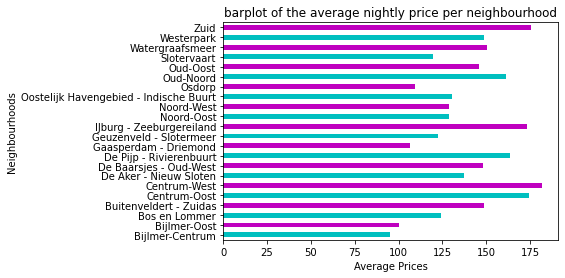

In [24]:
d1 = df.groupby('neighbourhood_cleansed')['price'].mean()
d1.plot(kind='barh', color=('c','m'))
plt.xlabel('Average Prices')
plt.ylabel('Neighbourhoods')
plt.title('barplot of the average nightly price per neighbourhood')

In [25]:
d2 = df[['review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

Text(0.5, 1.0, 'correlations between the five subitems of the review ratings')

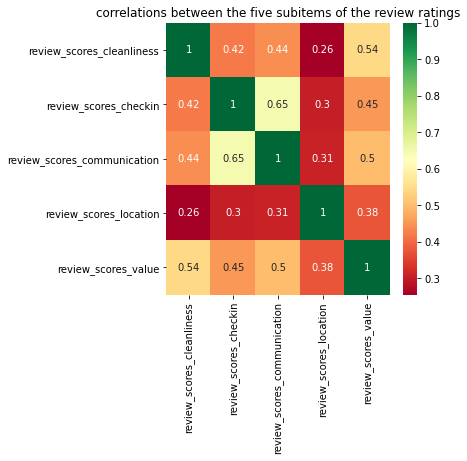

In [26]:
corrmat = d2.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(5,5))
g=sns.heatmap(d2[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title('correlations between the five subitems of the review ratings')

# Statistical analysis and recommender system


## Linear regression and t-tests


In [29]:
rating=df.review_scores_rating
accuracy=df.review_scores_accuracy
cleanliness=df.review_scores_cleanliness
checkin=df.review_scores_checkin
communication=df.review_scores_communication
location=df.review_scores_location
value=df.review_scores_value

fit = sm.OLS.from_formula('rating ~ accuracy + cleanliness + checkin + communication + location + value', df).fit()

In [30]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     7008.
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        19:45:18   Log-Likelihood:                -42957.
No. Observations:               15880   AIC:                         8.593e+04
Df Residuals:                   15873   BIC:                         8.598e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3169      0.550     -0.577

In [31]:
roomsdf = {row: {col: "value" for col in df['room_type'].unique()} for row in df['room_type'].unique()}

for i in df['room_type'].unique():
    for k in df['room_type'].unique():
        stat = ttest_ind(df[df['room_type']==i]['price'], df[df['room_type']==k]['price'])
        roomsdf[i][k] = stat.pvalue



In [32]:
roomsdf = pd.DataFrame(roomsdf)

In [33]:
roomsdf

,Private room,Entire home/apt,Hotel room,Shared room
Private room,1.000000e+00,3.624982e-184,0.000060,0.451693
Entire home/apt,3.624982e-184,1.000000e+00,0.002929,0.002177
Hotel room,5.966552e-05,2.929221e-03,1.000000,0.312119
Shared room,4.516929e-01,2.176832e-03,0.312119,1.000000


In [34]:
bonferronidf = roomsdf
for i in bonferronidf.columns:
    bonferronidf.loc[i] = multipletests(roomsdf.loc[i], alpha=0.01, method='bonferroni')[1]

In [35]:
bonferronidf

,Private room,Entire home/apt,Hotel room,Shared room
Private room,1.000000e+00,1.449993e-183,0.000239,1.000000
Entire home/apt,1.449993e-183,1.000000e+00,0.011717,0.008707
Hotel room,2.386621e-04,1.171688e-02,1.000000,1.000000
Shared room,1.000000e+00,8.707327e-03,1.000000,1.000000


## Linear regression with variable selection

In [36]:
dfr = df
#converting the categorical values 
dfr = pd.get_dummies(dfr, columns=['room_type'])
dfr = pd.get_dummies(dfr, columns=['property_type'])
dfr = pd.get_dummies(dfr, columns=['host_neighbourhood'])
dfr = pd.get_dummies(dfr, columns=['neighbourhood_cleansed'])

In [37]:
#renaming the columns by replacing a space, '/' and '-' with a '_' because the model will not recognise these signs as column names
dfr.columns = dfr.columns.str.replace(r"[ ]", "_")
dfr.columns = dfr.columns.str.replace(r"[/]", "_")
dfr.columns = dfr.columns.str.replace(r"[-]", "_")


<ipython-input-37-0d7550dde081>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dfr.columns = dfr.columns.str.replace(r"[ ]", "_")
<ipython-input-37-0d7550dde081>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dfr.columns = dfr.columns.str.replace(r"[/]", "_")
<ipython-input-37-0d7550dde081>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dfr.columns = dfr.columns.str.replace(r"[-]", "_")


In [38]:
dfr.iloc[:,36:]

,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,property_type_Barn,property_type_Boat,property_type_Bus,property_type_Camper_RV,property_type_Campsite,property_type_Cave,...,neighbourhood_cleansed_Noord_Oost,neighbourhood_cleansed_Noord_West,neighbourhood_cleansed_Oostelijk_Havengebied___Indische_Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud_Noord,neighbourhood_cleansed_Oud_Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18518,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18520,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#removing columns that have less than 100 values as they wont be important for the model
for x in dfr.iloc[:,36:]:
    if sum(dfr[x]) < 100:
        del dfr[x]

In [40]:
#selecting the predictors variables
#taking as much predictors as possible that make sense to get a price prediction
predictors = ['host_is_superhost',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_days'] + dfr.iloc[:,36:].columns.values.tolist() #adding all the categorical variables that were converted to binary


In [41]:
def variable_selection(df, predictors, target, alpha):
    
    chosen_pred = []
    r = []
    s = []
    highest = [1]
    
    #preparation for Part1
    #chosing the highest r2 
    for x in range(len(predictors)):
        r.append( sm.OLS.from_formula(target + '~' + predictors[x], df).fit().rsquared )
    
    #adding it to the list of chosen predictors while removing it from main list
    chosen_pred.append(predictors[r.index(max(r))])
    predictors.remove(predictors[r.index(max(r))])
    
    #PART1
    while max(highest) > 0.001:
    
        highest=[]    
        s = []
    
        for x in range(1,len(chosen_pred)+1):
            s.append(' + '.join(chosen_pred[0:x]))

        for x in range(len(predictors)):
            highest.append(sm.OLS.from_formula(target + '~' + predictors[x] +'+'+ s[-1], df).fit().rsquared - sm.OLS.from_formula('price' + '~' + s[-1], df).fit().rsquared )
   
        chosen_pred.append(predictors[highest.index(max(highest))])
        predictors.remove(predictors[highest.index(max(highest))])
    
    #PART2
    l=[1]

    while max(l) > alpha:
    
        l=[]
        l = list(sm.OLS.from_formula(target + '~' + s[-1], df).fit().pvalues)
        l.pop(0)
   
        chosen_pred.remove(chosen_pred[l.index(max(l))])
    
        s=[]
    
        for x in range(1,len(chosen_pred)+1):
            s.append(' + '.join(chosen_pred[0:x]))
            
    return chosen_pred               

In [42]:
variable_selection(dfr, predictors, 'price', 0.05)

['accommodates',
 'review_scores_location',
 'room_type_Private_room',
 'neighbourhood_cleansed_Centrum_West',
 'bedrooms',
 'neighbourhood_cleansed_Centrum_Oost',
 'minimum_nights',
 'property_type_Entire_loft',
 'neighbourhood_cleansed_De_Pijp___Rivierenbuurt',
 'host_neighbourhood_Oud_Zuid',
 'reviews_per_month',
 'host_neighbourhood_Nieuwmarkt_en_Lastage',
 'neighbourhood_cleansed_De_Baarsjes___Oud_West',
 'neighbourhood_cleansed_Westerpark',
 'neighbourhood_cleansed_Zuid',
 'host_neighbourhood_Grachtengordel']

## Recommendation systems

### Recommend a neighbourhood given a budget

In [43]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):
    a = [] #for absolute
    r = [] #for relative
    n = [] #for the neighbourhood names
    
    for x in df['neighbourhood_cleansed'].unique():
        n.append(x)
        a.append(sum(df['neighbourhood_cleansed'][(df['price']>=budget_min) & (df['price']<=budget_max)]==x))
        r.append(a[-1]/sum(df['neighbourhood_cleansed']==x))
    
    if relative == False:
        return n[a.index(max(a))] 
    elif relative == True:
        return n[r.index(max(r))]
        
    


In [44]:
recommend_neighbourhood(df, 10, 50, True)

'Bijlmer-Centrum'

### Price recommender for hosts

In [45]:
def recommend_price(df, latitude, longitude, n_neighbours, room_type=None):
    
    d = [] #for the euclidean distances
    p = [] #for the price
    r = [] #for the final result
            
    if room_type==None:
        for x in range(len(df)):
            p.append(df['price'][x])
            d.append(math.dist([latitude, longitude], [df['latitude'][x],df['longitude'][x]]))
            
        s = sorted(d)[:n_neighbours]
    
        for x in range(len(s)):
            r.append(p[d.index(s[x])]) 
            
        return mean(r)
    
            
    elif room_type in df['room_type'].unique():
        for x in range(len(df)):
            if df['room_type'][x]==room_type:
                p.append(df['price'][x])
                d.append(math.dist([latitude, longitude], [df['latitude'][x],df['longitude'][x]]))
                
        s = sorted(d)[:n_neighbours]
    
        for x in range(len(s)):
            r.append(p[d.index(s[x])]) 
            
        return mean(r)        
    
    else:
        print('this room type does not exist')
        


In [46]:
recommend_price(df, 52, 3, 20)

122.65

In [47]:
recommend_price(df, 52, 3, 20, 'Private room')

60.7

In [48]:
recommend_price(df, 52, 3, 20, 'long room')

this room type does not exist
